In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## importamos la base de datos
data=pd.ExcelFile('capturas_2015-2020.xlsx')

In [3]:
df_2015=data.parse(str(2015))
df_2016=data.parse(str(2016))
df_2017=data.parse(str(2017))
df_2018=data.parse(str(2018))
df_2019=data.parse(str(2019))
df_2020=data.parse(str(2020))


In [4]:
###1.Hacer una grafica del promedio de Diaphorinas por trampa para cada mes de los años 2015, 2017,2020. Es decir una grafica por cada año
#donde el eje horizontal este el mes y el vertical el promedio de diaphorinas por trampa.

promedio_2015= df_2015.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()
promedio_2016= df_2016.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()
promedio_2017= df_2017.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()
#promedio_2018= df_2018.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()
df_2019.rename(columns={'DiaphorinaXTrampa': 'No_DiaphorinasXtrampa'}, inplace=True)
promedio_2019= df_2019.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()
df_2020.rename(columns={'DiaphorinaXTrampa': 'No_DiaphorinasXtrampa'}, inplace=True)
promedio_2020= df_2020.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()

promedios={}
promedios[2015]=promedio_2015
promedios[2017]=promedio_2017
promedios[2020]=promedio_2020

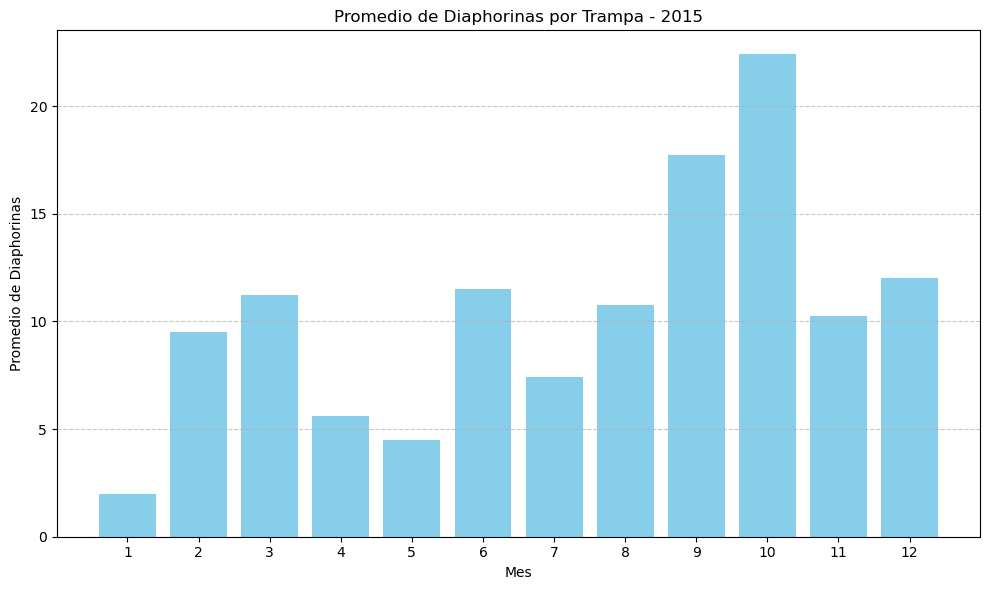

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(promedios[2015]['Mes'], promedios[2015]['No_DiaphorinasXtrampa'], color='skyblue')
plt.title('Promedio de Diaphorinas por Trampa - 2015')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(range(1, 13)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

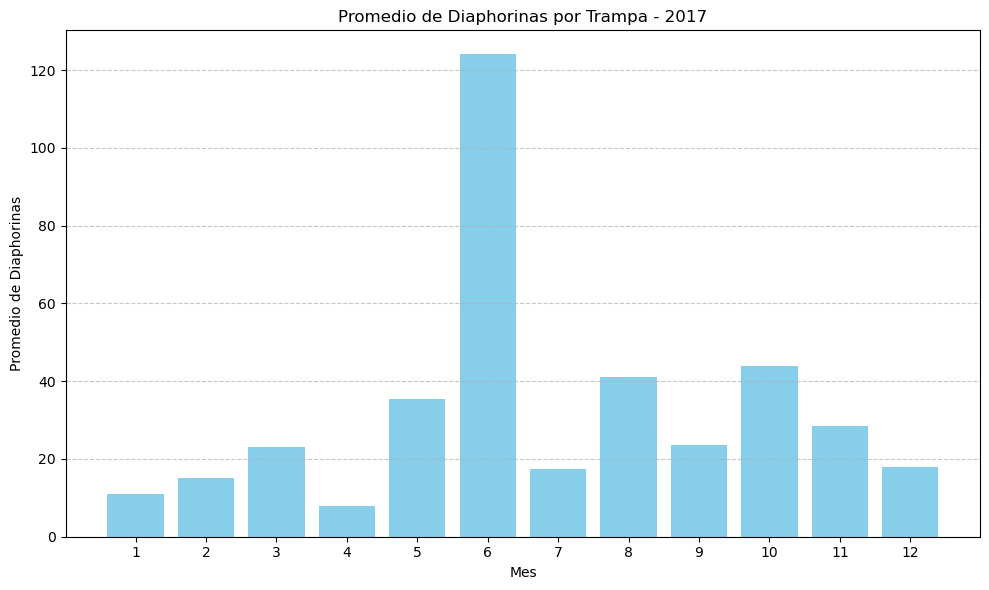

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(promedios[2017]['Mes'], promedios[2017]['No_DiaphorinasXtrampa'], color='skyblue')
plt.title('Promedio de Diaphorinas por Trampa - 2017')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

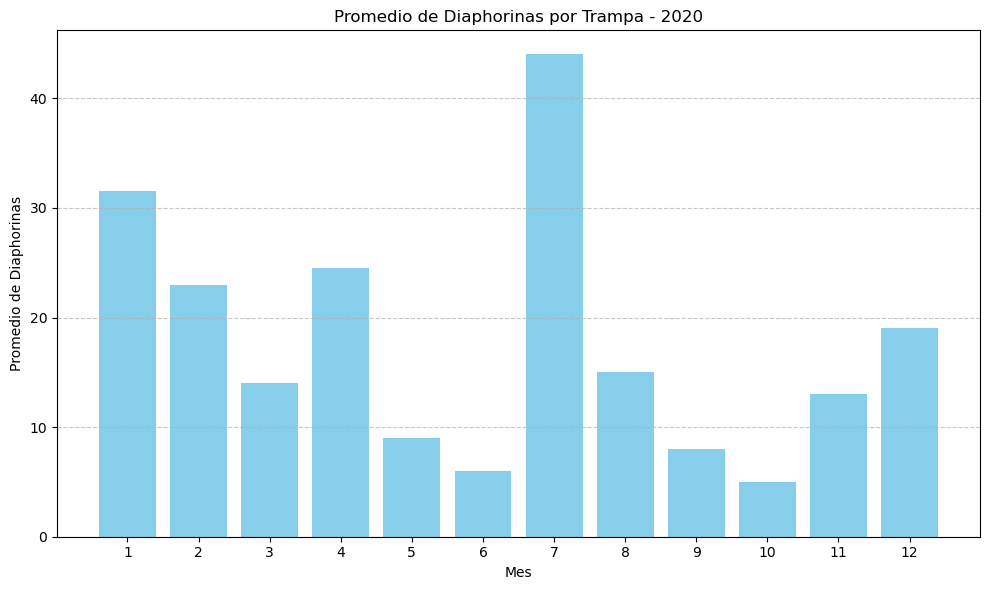

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(promedios[2020]['Mes'], promedios[2020]['No_DiaphorinasXtrampa'], color='skyblue')
plt.title('Promedio de Diaphorinas por Trampa - 2020')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

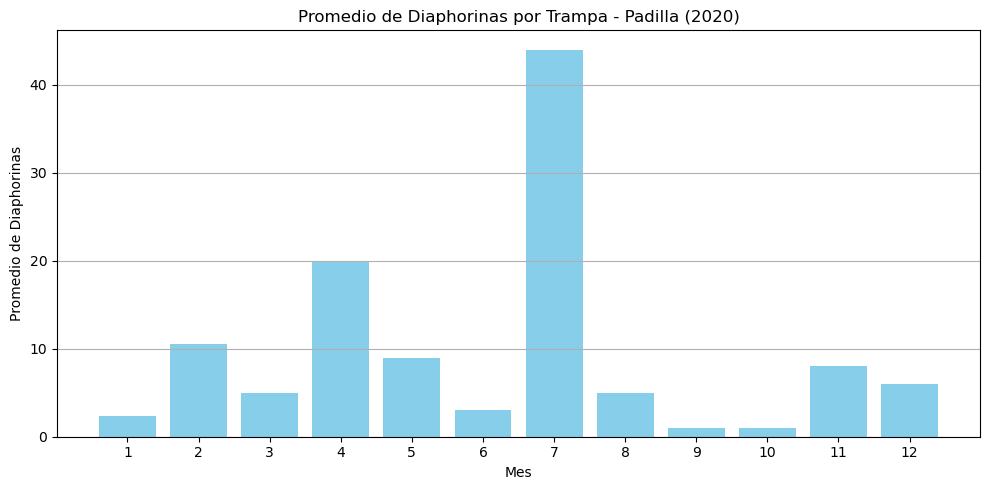

In [8]:
###2.Hacer una grafica del promedio de Diaphorinas por trampa para cada mes del ano 2020 per solo de un municipio.
df_2020 = data.parse('2020')
df_2020.rename(columns={'DiaphorinaXTrampa': 'No_DiaphorinasXtrampa'}, inplace=True)
df_municipio=df_2020[df_2020['Municipio'].isin(['PADILLA'])]

promedio_mensual = df_municipio.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(promedio_mensual['Mes'], promedio_mensual['No_DiaphorinasXtrampa'], color='skyblue')

plt.title('Promedio de Diaphorinas por Trampa - Padilla (2020)')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(promedio_mensual['Mes'].unique())
plt.grid(axis='y') 
plt.tight_layout()
plt.show()

In [9]:
###3.Hacer una tabla donde la primera columna sea el mes, la segunda el ındice Id (por trampa) y la tercera el ındice Cx para el ano 2015.
media_varianza = df_2015.groupby(['Mes', 'Ubicacion'])['No_DiaphorinasXtrampa'].agg(['mean', 'var']).reset_index()
media_varianza.columns = ['Mes', 'Ubicacion', 'Media', 'Varianza']

# Calcular el índice Id y el índice Cx
media_varianza['Id'] = media_varianza['Varianza'] / media_varianza['Media']
media_varianza['Cx'] = (media_varianza['Varianza'] / media_varianza['Media']) - 1

# Agrupar por mes para obtener un único valor por mes
tabla_resultado = media_varianza.groupby('Mes').agg({'Id': 'mean', 'Cx': 'mean'}).reset_index()

tabla_resultado


,Mes,Id,Cx
0,1.0,1.333333,0.333333
1,2.0,1.551807,0.551807
2,3.0,1.955214,0.955214
3,4.0,1.607015,0.607015
4,5.0,1.378070,0.378070
5,6.0,1.670615,0.670615
6,7.0,1.607321,0.607321
7,8.0,1.775027,0.775027
8,9.0,2.353512,1.353512
9,10.0,2.126256,1.126256


In [10]:
#4.Hacer una grafica del ındice Id (por trampa) como funcion del mes que abarque desde 2015 hasta 2020.
def calcular_id(df):
    media_varianza = df.groupby(['Mes', 'Ubicacion'])['No_DiaphorinasXtrampa'].agg(['mean', 'var']).reset_index()
    media_varianza.columns = ['Mes', 'Ubicacion', 'Media', 'Varianza']
    media_varianza['Id'] = media_varianza['Varianza'] / media_varianza['Media']
    tabla_resultados = media_varianza.groupby('Mes').agg({'Id': 'mean'}).reset_index()
    
    return tabla_resultados
resultados_por_ano = {}
for year, df in zip(range(2015, 2021), [df_2015, df_2016, df_2017, df_2019, df_2020]):
    tabla_resultados = calcular_id(df)
    resultados_por_ano[year] = tabla_resultados 
for year, resultado in resultados_por_ano.items():
    print(f"Resultados para el año {year}:")
    print(resultado)
    print() 

Resultados para el año 2015:
     Mes        Id
0    1.0  1.333333
1    2.0  1.551807
2    3.0  1.955214
3    4.0  1.607015
4    5.0  1.378070
5    6.0  1.670615
6    7.0  1.607321
7    8.0  1.775027
8    9.0  2.353512
9   10.0  2.126256
10  11.0  1.839815
11  12.0  1.585501

Resultados para el año 2016:
    Mes        Id
0     1  1.801782
1     2  1.981377
2     3  2.828370
3     4  1.965537
4     5  2.054529
5     6  1.697598
6     7  1.432730
7     8  1.840008
8     9  1.953666
9    10  1.760764
10   11  2.305173
11   12  1.483208

Resultados para el año 2017:
    Mes        Id
0     1       NaN
1     2  2.353256
2     3  3.014083
3     4  2.296515
4     5  2.234832
5     6  3.825917
6     7  1.972105
7     8  2.492407
8     9  2.348229
9    10  3.574410
10   11  2.247216
11   12  1.919222

Resultados para el año 2018:
    Mes        Id
0     1  1.812344
1     2       NaN
2     3  1.988835
3     4  1.690221
4     5  1.793261
5     6  1.687654
6     7  1.695434
7     8  1.511216
8   

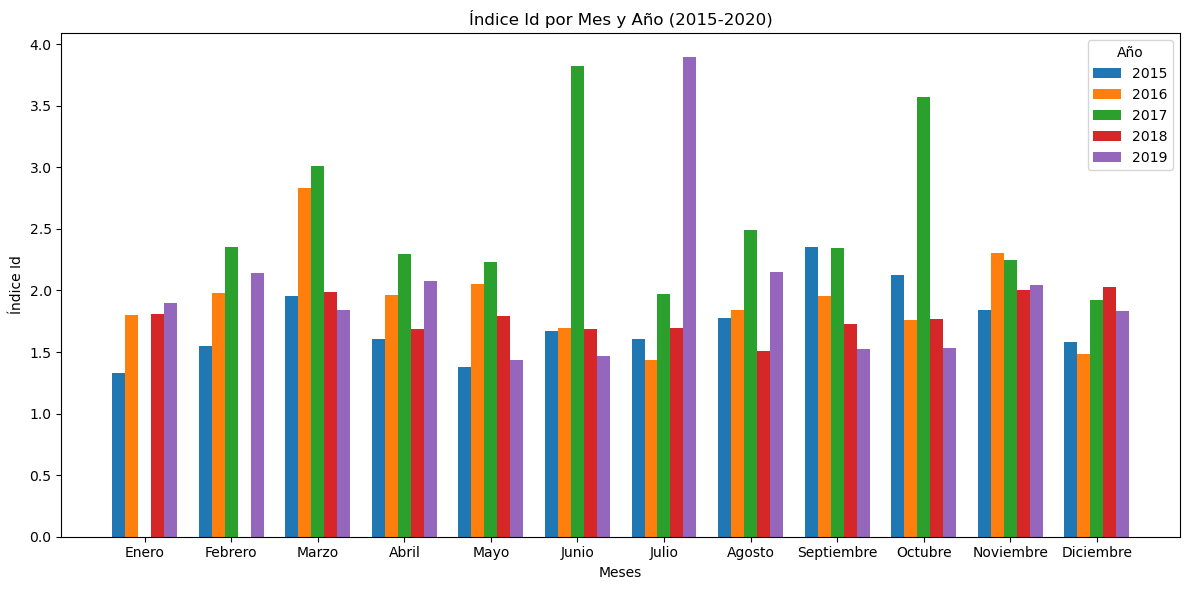

In [11]:
import matplotlib.pyplot as plt
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
valores_id = {year: resultado['Id'].tolist() for year, resultado in resultados_por_ano.items()}

x = range(len(meses))
width = 0.15
fig, ax = plt.subplots(figsize=(12, 6))
for i, year in enumerate(valores_id.keys()):
    ax.bar([pos + i * width for pos in x], valores_id[year], width, label=str(year))
ax.set_xlabel('Meses')
ax.set_ylabel('Índice Id')
ax.set_title('Índice Id por Mes y Año (2015-2020)')
ax.set_xticks([pos + width * (len(valores_id) - 1) / 2 for pos in x])
ax.set_xticklabels(meses)
ax.legend(title='Año')
plt.tight_layout()
plt.show()


In [12]:
###5.Hacer una grafica del centro de masa de las diaphorinas como funcion del mes que abarque de 2017 a 2020. Nota : CM=pos*Diaph/Ntrampas,
###donde CM se refiere al centro de masa, pos es la posicion de la trampa, Diaph es el promedio de diaphorinas en la trampa y Ntrampas 
###es el numero de trampas que se consideraron en el calculo.
df_all = pd.concat([df_2017, df_2019, df_2020], ignore_index=True)

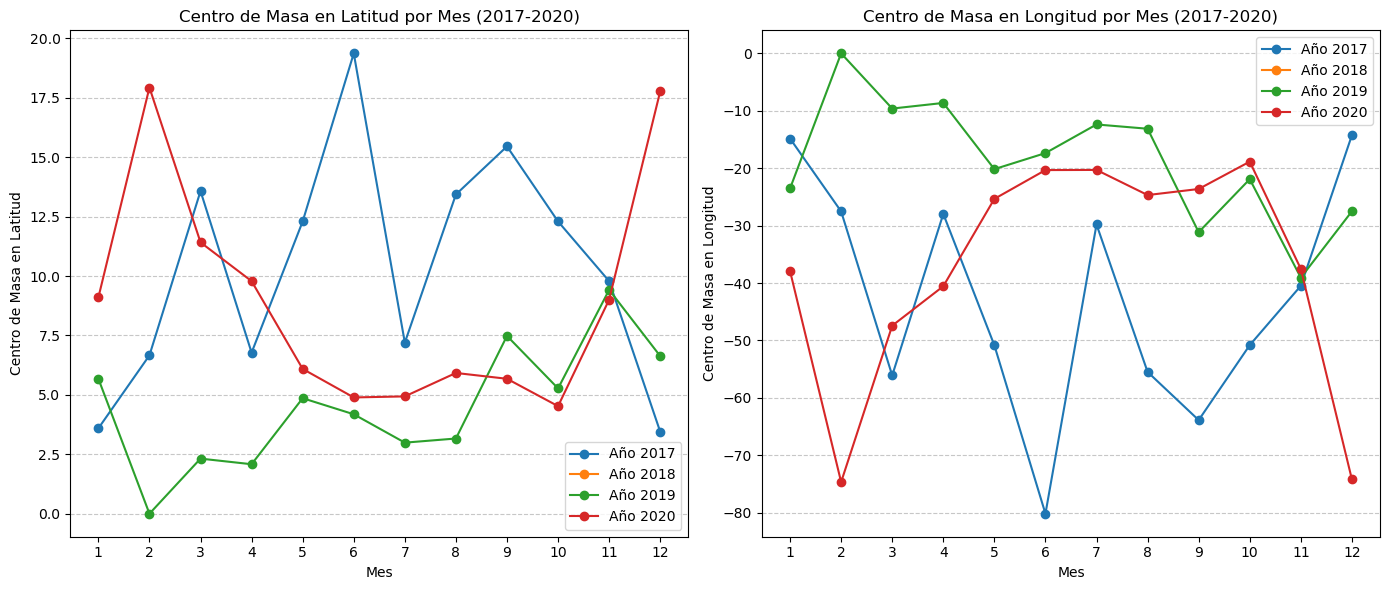

In [13]:
df_all['Fecha'] = pd.to_datetime(df_all['Fecha'])
df_all['Año'] = df_all['Fecha'].dt.year

cm_data = []

# Iterar sobre los años y meses para calcular CM
for year in [2017, 2018, 2019, 2020]:
    for month in range(1, 13):
        df_month = df_all[(df_all['Año'] == year) & (df_all['Mes'] == month)]

        if df_month.empty:
            continue
        promedio_diaph = df_month.groupby('Ubicacion')['No_DiaphorinasXtrampa'].mean().reset_index()
        promedio_diaph = promedio_diaph.merge(df_month[['Ubicacion', 'Latitud', 'Longitud']].drop_duplicates(), on='Ubicacion')
        N_trampas = len(promedio_diaph)

        # Calcular CM en latitud y longitud
        cm_latitud = (promedio_diaph['Latitud'] * promedio_diaph['No_DiaphorinasXtrampa']).sum() / N_trampas
        cm_longitud = (promedio_diaph['Longitud'] * promedio_diaph['No_DiaphorinasXtrampa']).sum() / N_trampas
        cm_data.append({'Año': year, 'Mes': month, 'CM_Latitud': cm_latitud, 'CM_Longitud': cm_longitud})
cm_df = pd.DataFrame(cm_data)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for year in [2017, 2018, 2019, 2020]:
    cm_df_year = cm_df[cm_df['Año'] == year]
    plt.plot(cm_df_year['Mes'], cm_df_year['CM_Latitud'], label=f'Año {year}', marker='o')
plt.title('Centro de Masa en Latitud por Mes (2017-2020)')
plt.xlabel('Mes')
plt.ylabel('Centro de Masa en Latitud')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplot(1, 2, 2)
for year in [2017, 2018, 2019, 2020]:
    cm_df_year = cm_df[cm_df['Año'] == year]
    plt.plot(cm_df_year['Mes'], cm_df_year['CM_Longitud'], label=f'Año {year}', marker='o')
plt.title('Centro de Masa en Longitud por Mes (2017-2020)')
plt.xlabel('Mes')
plt.ylabel('Centro de Masa en Longitud')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


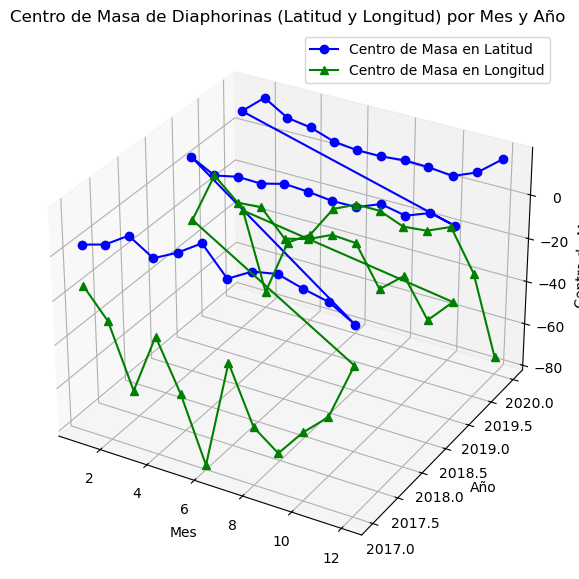

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(cm_df['Mes'], cm_df['Año'], cm_df['CM_Latitud'], label='Centro de Masa en Latitud', color='blue', marker='o')
ax.plot3D(cm_df['Mes'], cm_df['Año'], cm_df['CM_Longitud'], label='Centro de Masa en Longitud', color='green', marker='^')
ax.set_xlabel('Mes')
ax.set_ylabel('Año')
ax.set_zlabel('Centro de Masa')
ax.set_title('Centro de Masa de Diaphorinas (Latitud y Longitud) por Mes y Año')
ax.legend()
plt.show()